<a href="https://colab.research.google.com/github/tedha012/recommender_system/blob/master/chap6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 8.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633966 sha256=f88b8f6be0088457709c3972a1946fb87eeeb29782e730fcea78692dfff5a5df
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import numpy as np
import pandas as pd

In [3]:
# 필요한 Surprise 알고리즘 불러오기
from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [4]:
# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [8]:
# Train/Test 분리 
trainset, testset = train_test_split(data, test_size=0.25)

In [10]:
# 정확도 계산 
algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9496


0.9496370297765875

In [11]:
# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    algo = option()
    names.append(option.__name__)       # 알고리즘 이름 
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

Estimating biases using als...
RMSE: 0.9427
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9496
RMSE: 0.9401
RMSE: 0.9199


array([0.91989549, 0.94013802, 0.94269489, 0.94963703])

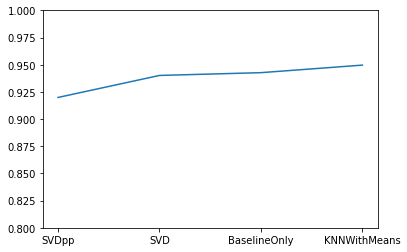

In [12]:
# 결과를 그래프로 표시
import matplotlib.pyplot as plt
index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

In [13]:
# 알고리즘 옵션 변경, 정확도 계산
sim_options = {'name': 'pearson_baseline', 'user_based': True}
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9354


0.9353907295306734

In [14]:
# 다양한 Neighbor size 비교 
result = []
for neighbor_size in (10, 20, 30, 40, 50, 60):
    algo = KNNWithMeans(k=neighbor_size, sim_options={'name':
           'pearson_baseline', 'user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9501
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9378
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9354
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9349
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9349
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9351


[[10, 0.9501256092121574],
 [20, 0.9378426084635965],
 [30, 0.9353907295306734],
 [40, 0.9348783077969418],
 [50, 0.9349276692693471],
 [60, 0.9351452191807206]]

In [15]:
# KNN 다양한 파라메터 비교
from surprise.model_selection import GridSearchCV
param_grid = {'k': [5, 10, 15, 25],
              'sim_options': {'name': ['pearson_baseline', 'cosine'],
                              'user_based': [True, False]}
              }
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

# 최적 RMSE 출력
print(gs.best_score['rmse'])

# 최적 RMSE의 parameter
print(gs.best_params['rmse'])


# SVD 다양한 파라메터 비교
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [70, 80, 90],
              'lr_all': [0.005, 0.006, 0.007],
              'reg_all': [0.05, 0.07, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

# 최적 RMSE 출력
print(gs.best_score['rmse'])

# 최적 RMSE의 parameter
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar